In [1]:
# import required liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv("C:\\Users\\skalk\\Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
print(df.describe())

       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min

In [5]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
#remove unwanted columns
unwanted_columns=['policy_number','policy_bind_date','_c39']
df.drop(unwanted_columns,axis=1,inplace=True)

In [7]:
#encode categorical variables(if any)
df=pd.get_dummies(df,drop_first=True)

<AxesSubplot:>

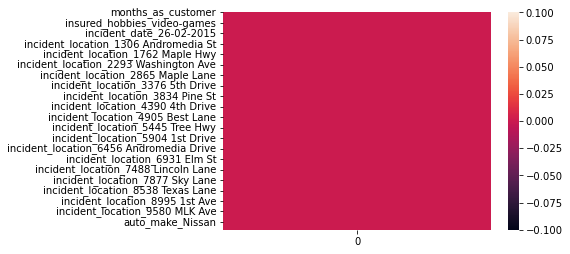

In [8]:
sns.heatmap(df.isnull().sum().to_frame())

In [14]:
df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved',
       ...
       'auto_model_RAM', 'auto_model_RSX', 'auto_model_Silverado',
       'auto_model_TL', 'auto_model_Tahoe', 'auto_model_Ultima',
       'auto_model_Wrangler', 'auto_model_X5', 'auto_model_X6',
       'fraud_reported_Y'],
      dtype='object', length=1204)

In [15]:
# Separate the features and target variable
x= df.drop('fraud_reported_Y', axis=1)
y= df['fraud_reported_Y']

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# Perform feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(x_test_scaled)

# Calculate accuracy and confusion matrix for logistic regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Train a random forest classifier
rfc = RandomForestClassifier()
rfc.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_rfc = rfc.predict(x_test_scaled)

# Calculate accuracy and confusion matrix for random forest classifier
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
confusion_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

# Print the results
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix_logreg)

print("\nRandom Forest Classifier Accuracy:", accuracy_rfc)
print("Random Forest Classifier Confusion Matrix:")
print(confusion_matrix_rfc)

Logistic Regression Accuracy: 0.745
Logistic Regression Confusion Matrix:
[[143   2]
 [ 49   6]]

Random Forest Classifier Accuracy: 0.715
Random Forest Classifier Confusion Matrix:
[[143   2]
 [ 55   0]]


In [20]:
# Hyperparameter tuning for logistic regression
logreg = LogisticRegression()
params_logreg = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_logreg = GridSearchCV(logreg, params_logreg, cv=5)
grid_logreg.fit(x_train_scaled, y_train)
best_logreg = grid_logreg.best_estimator_

In [22]:
# Hyperparameter tuning for random forest classifier
rfc = RandomForestClassifier()
params_rfc = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
grid_rfc = GridSearchCV(rfc, params_rfc, cv=5)
grid_rfc.fit(x_train_scaled, y_train)
best_rfc = grid_rfc.best_estimator_

# Make predictions on the test set with the best models
y_pred_logreg = best_logreg.predict(x_test_scaled)
y_pred_rfc = best_rfc.predict(x_test_scaled)

In [23]:
# Calculate accuracy and confusion matrix for logistic regression
accuracy_logreg= accuracy_score(y_test, y_pred_logreg)
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Calculate accuracy and confusion matrix for random forest classifier
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
confusion_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

# Print the results
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix_logreg)

print("\nRandom Forest Classifier Accuracy:", accuracy_rfc)
print("Random Forest Classifier Confusion Matrix:")
print(confusion_matrix_rfc)

Logistic Regression Accuracy: 0.73
Logistic Regression Confusion Matrix:
[[143   2]
 [ 52   3]]

Random Forest Classifier Accuracy: 0.725
Random Forest Classifier Confusion Matrix:
[[143   2]
 [ 53   2]]


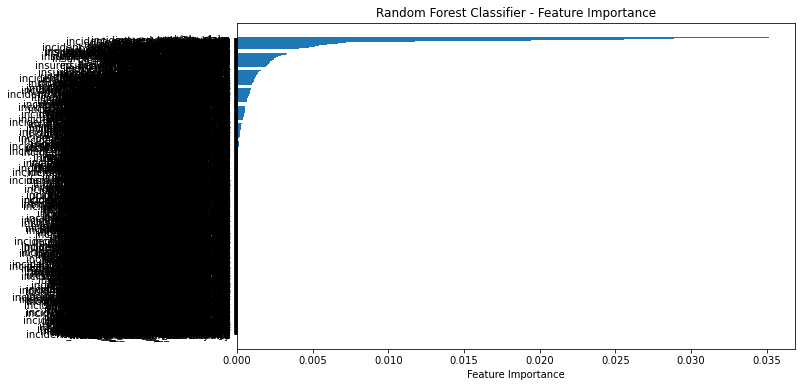

In [26]:
#Plotting feature importance for random forest classifier
feature_importance = best_rfc.feature_importances_
sorted_indices = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(x.shape[1]), feature_importance[sorted_indices], align='center')
plt.yticks(range(x.shape[1]), x.columns[sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Classifier - Feature Importance")
plt.show()